**<2021~2023년 기후 데이터와 재난 피해 현황 분석 보고서>**

(7조: 202104128강성빈,202004244한윤수,202104140김경록,202104144김규완)

**<개요>**

본 보고서는 2021년부터 2023년까지의 한국 기후 데이터와 재난 피해 통계를 바탕으로, 두 데이터 간의 연관성을 파악하고자 하는 목적을 가지고 작성되었습니다.
이를 위해 연도별로 기후 요약 정보를 정리하고, 각 연도에 발생한 재난 피해 통계를 병합하여 **상관관계 분석(heatmap)**을 수행했습니다.

**<데이터 개요>**

기후 데이터 (2021-2023_한국기후.csv)
기간: 2021년 ~ 2023년


In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#한글화 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
#csv 파일 불러오기
weather_df = pd.read_csv('2021-2023_한국기후.csv')
disaster_df = pd.read_csv('최근_10년간(2014-2023)_피해현황.csv')

In [ ]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year

**<주요 변수>**

temperature: 평균 기온 (°C)
rainfall: 총 강수량 (mm)
snow_cm: 평균 적설량 (cm)
snow_m: 평균 적설량 (m)
wind_speed: 평균 풍속 (m/s)

In [ ]:
yearly_weather = weather_df.groupby('year').agg({
    'temperature': 'mean',
    'rainfall': 'sum',
    'snow_cm': 'mean',
    'wind_speed': 'mean',
    'snow_m': 'mean'
}).reset_index()

print("✅ 연도별 날씨 요약 (2021~2023):")
display(yearly_weather)

✅ 연도별 날씨 요약 (2021~2023):


,year,temperature,rainfall,snow_cm,wind_speed,snow_m
0,2021,11.929612,1064.8,0.001358,5.092934,0.000045
1,2022,11.545742,1655.9,0.001271,4.891256,0.001505
2,2023,12.380662,1461.3,0.000535,4.810034,0.003525


**<주요 변수>**

incident_count: 재난 발생 건수
이재민: 피해 이재민 수
건물, 선박, 농경지, 농작물, 공공시설, 사유시설: 피해 항목별 수치 (피해 건수 또는 면적 등)

In [ ]:
disaster_summary = disaster_df.groupby('year').agg({
    'incident_count': 'sum',
    '이재민': 'sum',
    '건물': 'sum',
    '선박': 'sum',
    '농경지': 'sum',
    '농작물': 'sum',
    '공공시설': 'sum',
    '사유시설': 'sum'
}).reset_index()

print("✅ 연도별 재난 통계:")
display(disaster_summary)

✅ 연도별 재난 통계:


,year,incident_count,이재민,건물,선박,농경지,농작물,공공시설,사유시설
0,2014,2,"7,691","3,665,800","124,623","3,044,203",-,"142,999,425","30,184,617"
1,2015,-,92,"254,200","305,011","10,299",-,"13,131,644","18,160,990"
2,2016,7,"7,221","8,949,680","1,306,950","7,146,222",-,"211,592,180","59,867,442"
3,2017,7,"8,731","64,637,000","73,096","13,365,129",-,"103,673,588","5,553,458"
4,2018,53,"2,487","6,375,240","300,309","5,233,227",-,"102,047,615","27,327,800"
5,2019,48,"7,121","10,223,078","293,127","9,627,595",-,"156,258,644","39,823,430"
6,2020,75,"20,168","37,414,351","1,220,407","56,242,974",-,"1,174,673,634","48,626,006"
7,2021,42,"2,261","3,869,090","58,590","5,300,035",-,"51,277,957","5,547,982"
8,2022,64,"57,405","72,660,000","395,317","24,257,996",-,"470,561,134","24,781,774"
9,2023,140,"8,332","26,336,000","632,402","49,575,169","229,068,181","585,416,738","67,192,429"


In [ ]:
#병합: 2021 ~ 2023년만 공통적으로 병합
merged_df = pd.merge(yearly_weather, disaster_summary, on='year', how='inner')
print("✅ 병합된 연도별 날씨 + 재난 통계:")
display(merged_df)

✅ 병합된 연도별 날씨 + 재난 통계:


,year,temperature,rainfall,snow_cm,wind_speed,snow_m,incident_count,이재민,건물,선박,농경지,농작물,공공시설,사유시설
0,2021,11.929612,1064.8,0.001358,5.092934,0.000045,42,"2,261","3,869,090","58,590","5,300,035",-,"51,277,957","5,547,982"
1,2022,11.545742,1655.9,0.001271,4.891256,0.001505,64,"57,405","72,660,000","395,317","24,257,996",-,"470,561,134","24,781,774"
2,2023,12.380662,1461.3,0.000535,4.810034,0.003525,140,"8,332","26,336,000","632,402","49,575,169","229,068,181","585,416,738","67,192,429"


In [ ]:
#상관관계 분석
# 쉼표 제거 후 숫자형으로 변환
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        # 쉼표 제거, 공백 제거 → 숫자형으로 변환 시도
        merged_df[col] = merged_df[col].str.replace(',', '').str.strip()
        # 숫자로 변환 (변환 불가능한 값은 NaN 처리)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

C:\Users\kkwan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\kkwan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kkwan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


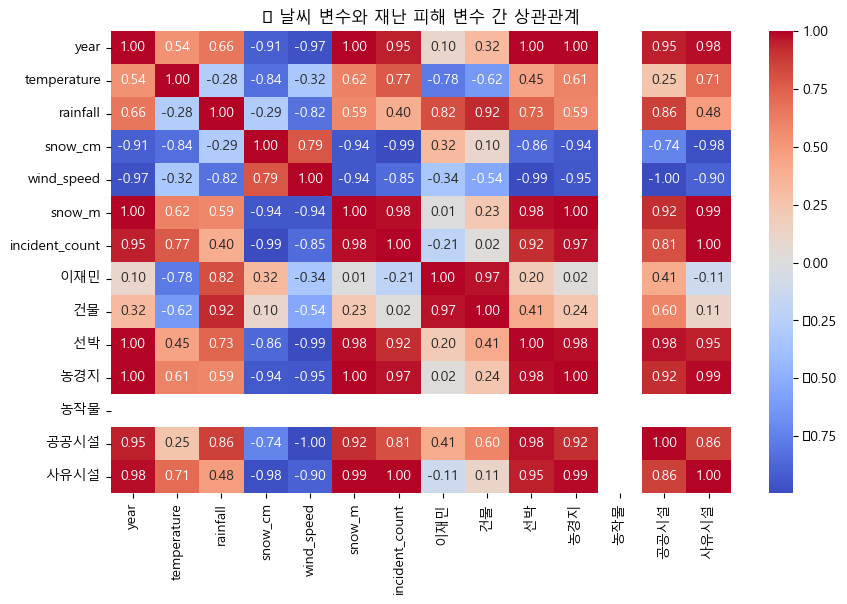

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🌡 날씨 변수와 재난 피해 변수 간 상관관계")
plt.show()

In [ ]:
merged_df.to_csv('weather_disaster_2021_2023_merged.csv', index=False)
print("✅ 병합된 데이터 저장 완료")

✅ 병합된 데이터 저장 완료


이 그림은 연도별 기후 변수와 재난 피해 변수 간의 상관관계를 히트맵으로 나타낸 것입니다.

**<상관관계 히트맵>**

색이 붉은 계열일수록 양의 상관관계(값이 함께 증가)
색이 푸른 계열일수록 음의 상관관계(한 값이 증가하면 다른 값은 감소)
0에 가까울수록 관계가 약함

rainfall과 incident_count간 상관계수 높게 나타나고 있음, 강수량이 많을수록 재난이 더 많이 발생하는 경향이 있음.

**<결론 및 제안>**

기후 요인과 재난 피해 간에는 일정 수준의 상관관계가 존재함을 확인.
특히, 강수량과 이재민 수, 농작물 피해 등과의 관련성이 높게 나타날 가능성.
향후 예측 모델을 설계할 경우, 이러한 변수 간의 연관성을 반영하여 재난 발생 가능성 예측 시스템개발 가능.

**향후 과제**

1.시계열 모델링(Timeseries Forecasting)을 통해 연도별 재난 피해 예측

2.지역별 기후 및 재난 데이터 분석으로 공간적 연관성탐색

3.기후변화에 따른 장기 트렌드 분석및 시나리오 시뮬레이션